# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [4]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [5]:
media = df.groupby('Categoria')['Preco_Normal'].mean()
print(media)

Categoria
belleza-y-cuidado-personal    1783.556485
comidas-preparadas            3095.043478
congelados                    2108.042553
frutas                        1724.473684
instantaneos-y-sopas           765.491228
lacteos                       2385.219239
verduras                      1343.296875
Name: Preco_Normal, dtype: float64


In [7]:
mediana = df.groupby('Categoria')['Preco_Normal'].median()
print(mediana)

Categoria
belleza-y-cuidado-personal    1569.0
comidas-preparadas            3290.0
congelados                    1519.0
frutas                        1195.0
instantaneos-y-sopas           439.0
lacteos                        989.0
verduras                      1180.0
Name: Preco_Normal, dtype: float64


Todas as categorias apresentam diferenças entre mediana e média, demonstrando que nenhuma é uma normal perfeita.

As categorias em que a média é **menor** que a mediana são:

*   comidas-preparadas

As categorias em que a média é **maior** que a mediana são:

*   belleza-y-cuidado-personal
*   congelados
*   frutas
*   instantaneos-y-sopas
*   lacteos
*   verduras



# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [11]:
desvio = df.groupby('Categoria')['Preco_Normal'].std().reset_index().sort_values(by='Preco_Normal', ascending=False)
print(desvio)

                    Categoria  Preco_Normal
5                     lacteos   3925.816164
0  belleza-y-cuidado-personal   2210.041719
2                  congelados   2111.539896
1          comidas-preparadas   2019.911428
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
6                    verduras   1012.699625


Observando os valores do desvio padrão das categorias nota-se que os elementos com maiores desvios (lacteos e belleza-y-cuidado-personal) são os que apresentam maiores diferenças entre as médias e medianas.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

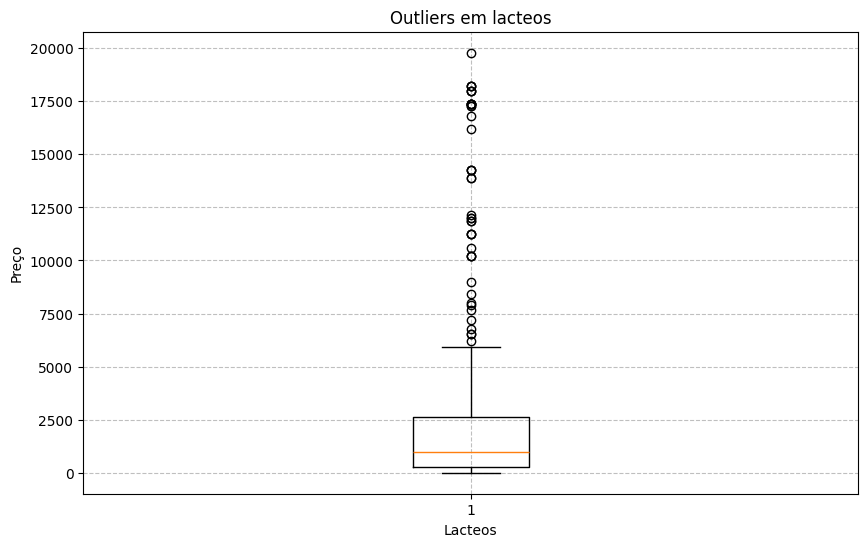

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot(df.loc[df['Categoria'] == 'lacteos', 'Preco_Normal'])

plt.title('Outliers em lacteos')
plt.xlabel('Lacteos')
plt.ylabel('Preço')
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

Pela análise do boxplot percebe-se a presença de muitos outliers com valores muito distintos da média.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

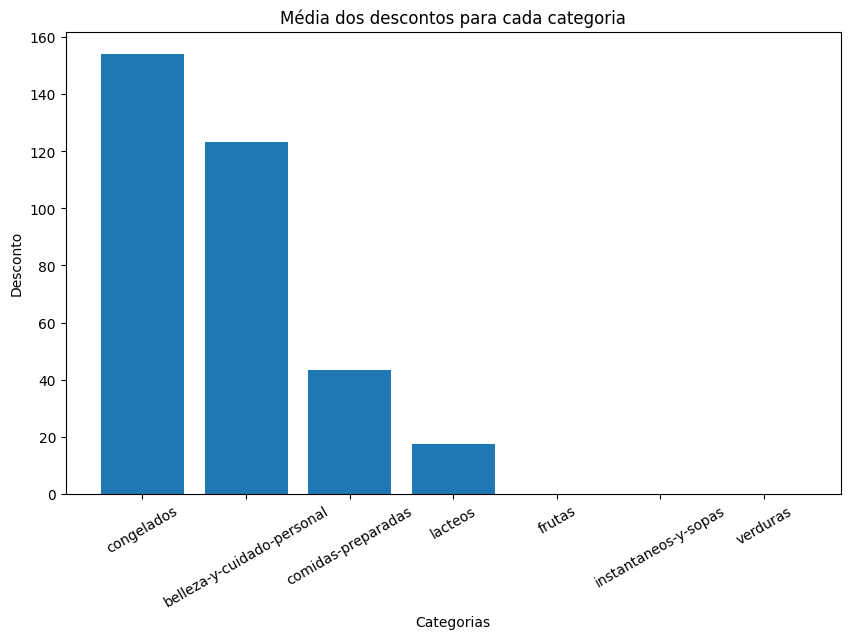

In [35]:
plt.figure(figsize=(10,6))
df_desconto_agrupado = df.groupby('Categoria')['Desconto'].mean().reset_index().sort_values(by='Desconto', ascending=False)
plt.bar(df_desconto_agrupado['Categoria'], df_desconto_agrupado['Desconto'])

plt.title('Média dos descontos para cada categoria')
plt.xlabel('Categorias')
plt.ylabel('Desconto')
plt.xticks(rotation=30)
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [36]:
df_agrupado_cate_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()
fig = px.treemap(df_agrupado_cate_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Descontos por categoria e marca',
                 color='Categoria'
)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
